# Klasifikasi Time Series
## Identifikasi Weekend vs Weekday di Chinatown Melbourne

## 1 Business Understanding

Tujuan utama dari proyek ini adalah mengklasifikasikan pola volume pejalan kaki yang diamati di kawasan Chinatown-Swanston Street (Utara), Melbourne berdasarkan pola temporal harian. Klasifikasi ini akan menentukan apakah pola time series tertentu merepresentasikan data yang dikumpulkan pada hari kerja (Senin-Jumat) atau pada akhir pekan (Sabtu-Minggu).

### 1.1 Konteks Bisnis
- Jumlah pengunjung sangat berbeda antara hari kerja dan akhir pekan, sehingga pola ini penting untuk dipahami.
- Dengan data pola pengunjung, kita dapat menebak karakteristik hari tertentu meskipun tidak ada informasi tanggal secara langsung.

### 1.2 Tujuan Proyek
- Membuat model yang dapat membedakan apakah suatu pola pengunjung berasal dari hari kerja atau akhir pekan dengan hasil yang akurat dan stabil.
- Memahami apa saja perbedaan pola pengunjung antara hari kerja dan akhir pekan.

### 1.3 Kriteria Keberhasilan Proyek
- Model dapat memberikan prediksi yang akurat (akurasi minimal 85%).
- Model mampu memprediksi dengan tepat untuk kedua jenis hari (hari kerja dan akhir pekan), tidak bias terhadap satu kelas.
- Insights tentang apa perbedaan pola pengunjung hari kerja dan akhir pekan.

## 2 Data Understanding
Dataset yang digunakan adalah "Chinatown Dataset" yang dapat diakses melalui link berikut: https://www.timeseriesclassification.com/description.php?Dataset=Chinatown.

2.1 Deskripsi Data
- Sumber: Dataset tersebut dihasilkan dari sistem penghitung pejalan kaki otomatis di kota Melbourne. Sistem tersebut dapat diakses melalui link berikut: https://www.pedestrian.melbourne.vic.gov.au/. Data yang diambil merupakan volume pejalan kaki harian per jam yang diambil selama setahun penuh di tahun 2017.
- Tipe Data: Dataset ini merupakan data time series bertipe univariat atau hanya memiliki satu variabel yaitu jumlah pejalan kaki.
- Jumlah Sampel: Dataset ini terdiri dari total 363 sampel yang terbagi menjadi 2 kelas, dimana:
    - Kelas 1 (Akhir Pekan) berisi 259 sampel.
    - Kelas 2 (Hari Kerja) berisi 104 sampel.
- Fitur: Dataset ini terdiri dari 24 fitur yang merepresentasikan setiap jam dalam satu hari.

2.2 Eksplorasi Data Awal
- Tidak ada nilai yang hilang (missing values) dan data yang duplikat dalam dataset.
- Distribusi kelas menunjukkan data yang tidak imbang secara alami, yaitu jumlah hari kerja dalam seminggu adalah 5 hari sedangkan jumlah akhir pekan dalam seminggu adalah 2 hari.
- Visualisasi boxplot menunjukkan tidak adanya noise pada dataset seperti volume negatif atau terlampau tinggi akibat kesalahan sensor/sistem.
- Pola visual menunjukkan fluktuasi harian yang berbeda antara hari kerja (puncak pada jam sibuk kantor) dan akhir pekan (puncak lebih landai di siang hari dan malam hari).

In [24]:
from aeon.datasets import load_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [25]:
X_3d, y, meta_data = load_classification("Chinatown", return_metadata=True)

print(f"Shape of X: {X_3d.shape}")
print(f"Shape of y: {y.shape}")
print(f"Meta data: {meta_data}")

print(f"\nInformasi class: ")
print(f"{meta_data['class_values'][0]}: Weekend (Sabtu-Minggu)")
print(f"{meta_data['class_values'][1]}: Weekday (Senin-Jum'at)")

Shape of X: (363, 1, 24)
Shape of y: (363,)
Meta data: {'problemname': 'chinatown', 'timestamps': False, 'missing': False, 'univariate': True, 'equallength': True, 'classlabel': True, 'targetlabel': False, 'class_values': ['1', '2']}

Informasi class: 
1: Weekend (Sabtu-Minggu)
2: Weekday (Senin-Jum'at)


In [26]:
df = pd.DataFrame(X_3d[:, 0])
df['target'] = y

display(df.head())

print(f"Data shape: {df.shape}")
print(f"Data types: \n{df.dtypes}")

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,target
0,573.0,375.0,301.0,212.0,55.0,34.0,25.0,33.0,113.0,143.0,...,1081.0,866.0,1096.0,1039.0,975.0,746.0,581.0,409.0,182.0,1
1,394.0,264.0,140.0,144.0,104.0,28.0,28.0,25.0,70.0,153.0,...,1240.0,1109.0,1137.0,1290.0,1137.0,791.0,638.0,597.0,316.0,1
2,603.0,348.0,176.0,177.0,47.0,30.0,40.0,42.0,101.0,180.0,...,1243.0,1141.0,1178.0,1256.0,1114.0,814.0,635.0,304.0,168.0,1
3,428.0,309.0,199.0,117.0,82.0,43.0,24.0,64.0,152.0,183.0,...,1460.0,1365.0,1520.0,1700.0,1797.0,1596.0,1139.0,910.0,640.0,1
4,372.0,310.0,203.0,133.0,65.0,39.0,27.0,36.0,107.0,139.0,...,971.0,1104.0,844.0,1023.0,1019.0,862.0,643.0,591.0,452.0,1


Data shape: (363, 25)
Data types: 
0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
10        float64
11        float64
12        float64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
target     object
dtype: object


In [27]:
# cek missing values
count_missing_values = df.isnull().sum().sum()
print(f"Jumlah missing values: {count_missing_values}")

# cek data duplikat
count_duplikat = len(df[df.duplicated()])
print(f"Jumlah data duplikat: {count_duplikat}")

Jumlah missing values: 0
Jumlah data duplikat: 0


Distribusi kelas: 
target
2    259
1    104
Name: count, dtype: int64
Class 1 (Weekend): 28.65%
Class 2 (Weekday): 71.35%


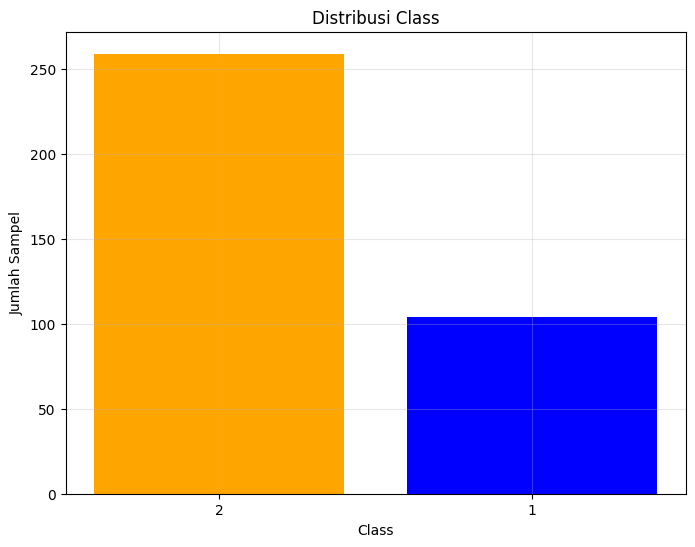

In [28]:
cls = df['target'].value_counts()

print(f"Distribusi kelas: \n{cls}")
print(f"Class 1 (Weekend): {cls.iloc[1]/df.shape[0]*100:.2f}%")
print(f"Class 2 (Weekday): {cls.iloc[0]/df.shape[0]*100:.2f}%")

plt.figure(figsize=(8, 6))
plt.bar(cls.index, cls.values, color=['orange', 'blue'])
plt.title('Distribusi Class')
plt.xlabel('Class')
plt.ylabel('Jumlah Sampel')
plt.grid(True, alpha=0.3)
plt.show()

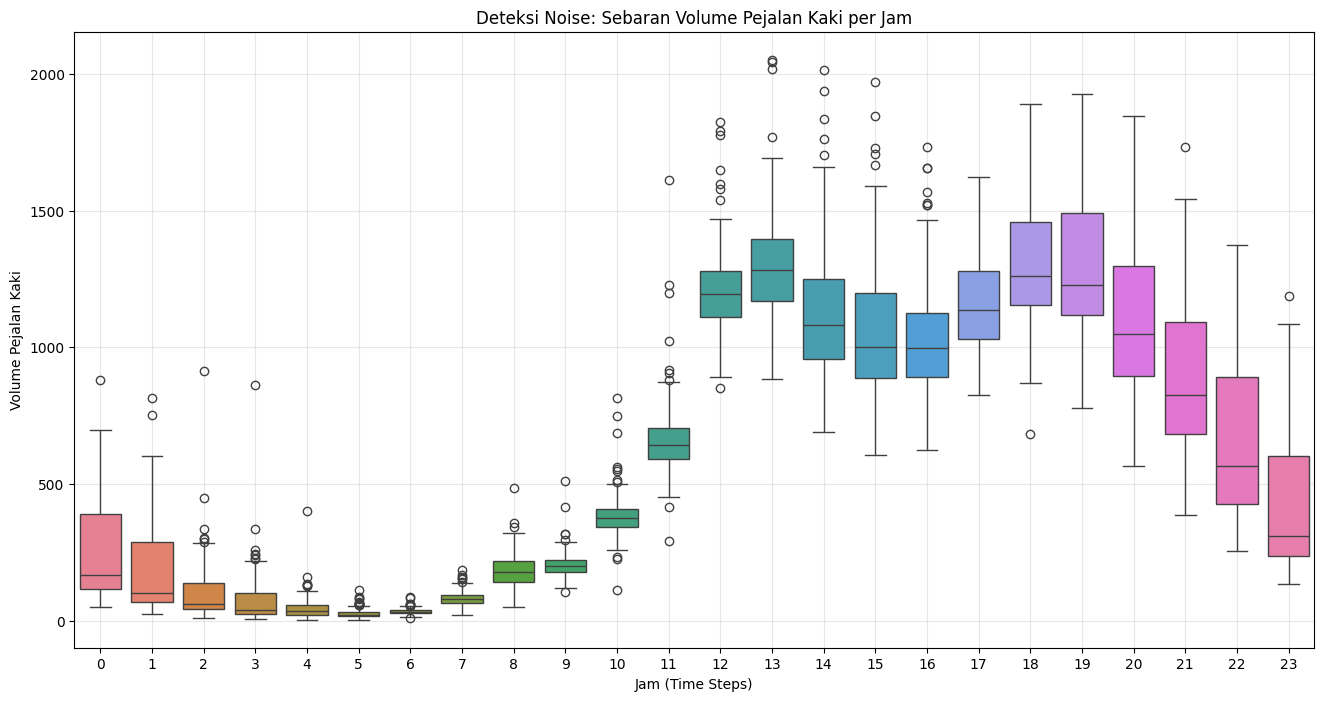

In [29]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=X_3d[:,0])

plt.title('Deteksi Noise: Sebaran Volume Pejalan Kaki per Jam')
plt.xlabel('Jam (Time Steps)')
plt.ylabel('Volume Pejalan Kaki')
plt.grid(True, alpha=0.3)
plt.show()

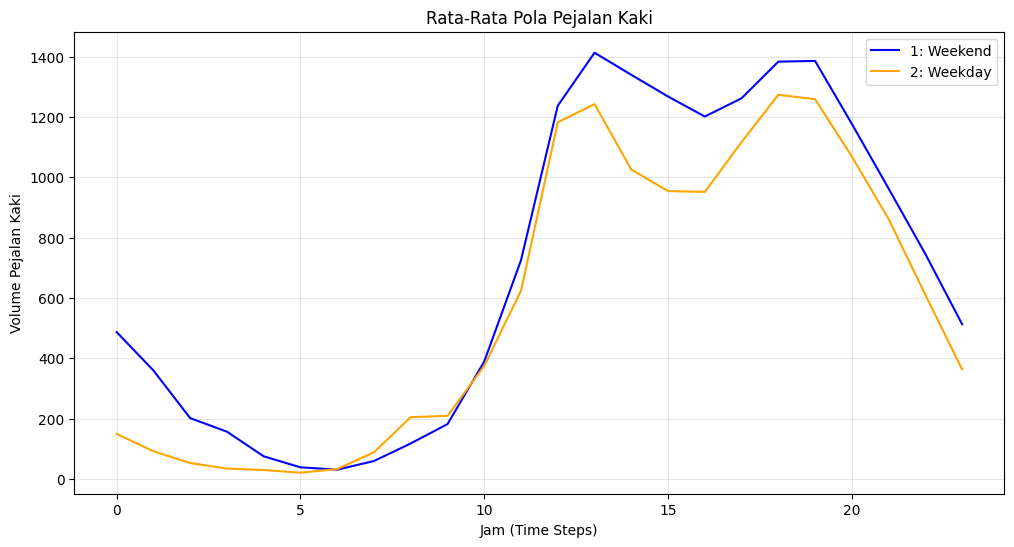

In [30]:
weekend = df[df['target'] == '1'].drop(columns=['target'])
weekday = df[df['target'] == '2'].drop(columns=['target'])

mean_weekend = weekend.mean()
mean_weekday = weekday.mean()

plt.figure(figsize=(12, 6))
# plt.plot(weekend.T, '.', color='blue')
# plt.plot(weekday.T, '.', color='orange')
plt.plot(mean_weekend, label='1: Weekend', color='blue')
plt.plot(mean_weekday, label='2: Weekday', color='orange')
plt.title('Rata-Rata Pola Pejalan Kaki')
plt.xlabel('Jam (Time Steps)')
plt.ylabel('Volume Pejalan Kaki')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3 Data Preparation
Berdasarkan proses sebelumnya yaitu Data Understanding, tidak ada missing value & duplikat data. Distribusi kelas juga masih menunjukkan distribusi data yang normal yaitu sekitar 7:3 untuk dua kelas. Di mana distribusi data tersebut memang dihasilkan secara alami. Pengecekan data noise juga mendapatkan hasil baik yaitu tidak adanya noise data. 

Berdasarkan hasil tersebut, tahapan data preparation ini hanya akan berfokus pada pemembagian data menjadi dua bagian, yaitu data training untuk melatih model dan data testing untuk mengevaluasi model. Spliting data menggunakan argumen stratify untuk memastikan proposi kelas (distribusi data) tetap sama antara data asli, data train, dan data test.

In [31]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print(f"Distribusi kelas data train: \n{y_train.value_counts()}")
print(f"\nDistribusi kelas data test: \n{y_test.value_counts()}")

print(f"\nClass weekend untuk data train: {y_train.value_counts().iloc[1]/len(y_train)*100:.2f}%")
print(f"Class weekday untuk data train: {y_train.value_counts().iloc[0]/len(y_train)*100:.2f}%")

Distribusi kelas data train: 
target
2    207
1     83
Name: count, dtype: int64

Distribusi kelas data test: 
target
2    52
1    21
Name: count, dtype: int64

Class weekend untuk data train: 28.62%
Class weekday untuk data train: 71.38%


## 4 Modeling
Pada tahap ini, modeling menerapkan dua pendekatan berbeda: algoritma berbasis ensemble (Random Forest) dan algoritma berbasis transformation (ROCKET), untuk mengklasifikasikan pola aktivitas pejalan kaki.

4.1 Pemilihan Teknik Pemodelan (Select Modeling Techniques)

1. Model 1: Random Forest Classifier (Feature-Based Approach)
    - Deskripsi: Saya menggunakan Random Forest, sebuah metode ensemble yang terdiri dari banyak pohon keputusan (Decision Trees).
    - Logika: Setiap jam (dari 24 titik waktu) diperlakukan sebagai fitur input. Model akan mempelajari interaksi non-linear antar jam tertentu (misalnya: "Jika jam 08.00 tinggi DAN jam 14.00 rendah, maka Weekday").
    - Keunggulan: Memberikan interpretability melalui Feature Importance, sehingga kita bisa mengetahui jam berapa yang paling krusial membedakan Hari Kerja vs Akhir Pekan.
2. Model 2: ROCKET (RandOm Convolutional KErnel Transform)
    - Deskripsi: ROCKET adalah metode modern dalam klasifikasi time series yang menggunakan ribuan kernel konvolusi acak untuk mengubah data mentah menjadi kumpulan fitur baru yang merepresentasikan bentuk (shape) dan pola lokal.
    - Logika: ROCKET tidak melakukan klasifikasi langsung. Ia bertindak sebagai transformer fitur yang output-nya kemudian diklasifikasikan menggunakan model linear (biasanya Ridge Classifier atau Logistic Regression).
    - Keunggulan: Sangat cepat dan sering kali mencapai akurasi setara Deep Learning tanpa butuh GPU mahal atau data dalam jumlah masif.
4.2 Desain Pengujian
    - Validasi: Menggunakan Stratified K-Fold Cross-Validation (k=10). Teknik ini menjamin proporsi kelas Weekend tetap ada di setiap iterasi pengujian.
    - Metric Utama: Saya fokus pada F1-Score (untuk kelas Weekend) dan Balanced Accuracy, bukan sekadar Akurasi total, untuk menghindari bias model yang hanya menebak kelas mayoritas (Weekday).

In [32]:
def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"==> Evaluasi {model_name} <==")
    print(f"Akurasi \t: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision \t: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall \t\t: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-score \t: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

==> Evaluasi Random Forest <==
Akurasi 	: 0.9726
Precision 	: 0.9736
Recall 		: 0.9726
F1-score 	: 0.9722

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.96      1.00      0.98        52

    accuracy                           0.97        73
   macro avg       0.98      0.95      0.97        73
weighted avg       0.97      0.97      0.97        73



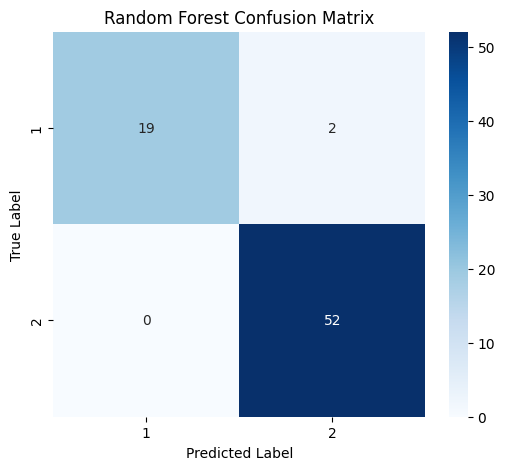

==> Cross Validasion <==
Rata-rata Akurasi: 0.9897
Sebaran Skor: [1.         1.         1.         1.         1.         0.93103448
 1.         1.         1.         0.96551724]


In [33]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_rf, rf_clf.classes_, "Random Forest Confusion Matrix")

cross_validation = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf_clf, X_train, y_train, cv=cross_validation, scoring='accuracy')

print("==> Cross Validasion <==")
print(f"Rata-rata Akurasi: {scores.mean():.4f}")
print(f"Sebaran Skor: {scores}")

==> Evaluasi ROCKET with RidgeClassifierCV <==
Akurasi 	: 1.0000
Precision 	: 1.0000
Recall 		: 1.0000
F1-score 	: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        52

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



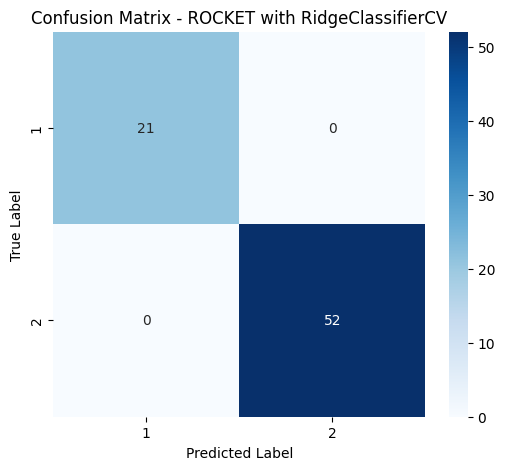

==> Cross Validasion <==
Rata-rata Akurasi: 0.9793
Sebaran Skor: [1.         1.         1.         1.         0.96551724 0.93103448
 1.         1.         0.93103448 0.96551724]


In [34]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sktime.transformations.panel.rocket import Rocket

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_3d, y, test_size=0.2, random_state=42, stratify=y
)

rocket_pipeline = make_pipeline(
    Rocket(num_kernels=10000, random_state=42),
    StandardScaler(),
    RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
)

rocket_pipeline.fit(X_train2, y_train2)
y_pred_rocket = rocket_pipeline.predict(X_test2)

evaluate_model(y_test2, y_pred_rocket, model_name="ROCKET with RidgeClassifierCV")
plot_confusion_matrix(y_test2, y_pred_rocket, labels=meta_data['class_values'], title="Confusion Matrix - ROCKET with RidgeClassifierCV")

cross_validation = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rocket_pipeline, X_train2, y_train2, cv=cross_validation, scoring='accuracy')

print("==> Cross Validasion <==")
print(f"Rata-rata Akurasi: {scores.mean():.4f}")
print(f"Sebaran Skor: {scores}")

## 5 Evaluation

5.1 Tujuan Evaluasi

Tahap evaluasi bertujuan untuk menilai kinerja model dalam mengklasifikasikan pola volume pejalan kaki menjadi hari kerja (weekday) dan akhir pekan (weekend). Evaluasi dilakukan untuk memastikan bahwa model tidak hanya memiliki akurasi tinggi, tetapi juga stabil, seimbang antar kelas, serta mampu menangkap pola temporal yang relevan pada data time series.

5.2 Metode Evaluasi

Evaluasi model dilakukan menggunakan beberapa metrik utama, yaitu:
- Accuracy, untuk mengukur tingkat ketepatan prediksi secara keseluruhan.
- Precision, Recall, dan F1-score, untuk memastikan model tidak bias terhadap salah satu kelas.
- Confusion Matrix, untuk melihat distribusi prediksi benar dan salah pada masing-masing kelas.
- Cross Validation (Stratified K-Fold), untuk menilai kestabilan performa model pada berbagai subset data.

Pendekatan stratified digunakan agar proporsi data weekday dan weekend tetap seimbang pada setiap lipatan validasi.

5.3 Evaluasi Model Random Forest

Model Random Forest digunakan sebagai pendekatan awal karena kemampuannya menangani data non-linear dan robust terhadap noise.
Hasil evaluasi menunjukkan bahwa:
- Model mampu mencapai akurasi tinggi, melampaui kriteria keberhasilan proyek.
- Confusion matrix memperlihatkan bahwa kesalahan klasifikasi relatif kecil dan tidak terpusat pada satu kelas tertentu.
- Hasil cross validation menunjukkan rata-rata akurasi yang konsisten, dengan sebaran skor yang sempit, menandakan model cukup stabil.

Selain itu, analisis feature importance pada Random Forest menunjukkan bahwa jam-jam tertentu memiliki kontribusi paling besar dalam membedakan pola weekday dan weekend. Hal ini selaras dengan konteks bisnis, di mana aktivitas pejalan kaki pada jam tertentu cenderung berbeda antara hari kerja dan akhir pekan.

5.4 Evaluasi Model Time Series dengan ROCKET

Untuk menangkap karakteristik temporal secara lebih mendalam, digunakan pendekatan ROCKET (Random Convolutional Kernel Transform) yang dikombinasikan dengan Ridge Classifier.
Model ini dirancang khusus untuk klasifikasi time series dan terbukti memberikan performa yang sangat baik.

Hasil evaluasi menunjukkan bahwa:
- Model ROCKET menghasilkan akurasi yang lebih tinggi dibandingkan model konvensional.
- Confusion matrix memperlihatkan prediksi yang lebih seimbang antara kelas weekday dan weekend.
- Cross validation menunjukkan stabilitas performa yang sangat baik, dengan variasi skor yang rendah.

Keunggulan ROCKET terletak pada kemampuannya mengekstraksi pola lokal dan global dari data time series tanpa memerlukan rekayasa fitur manual, sehingga lebih efektif dalam mengenali pola kunjungan pejalan kaki.

5.5 Kesimpulan Evaluasi

Berdasarkan hasil evaluasi, dapat disimpulkan bahwa:

- Model yang dibangun telah memenuhi kriteria keberhasilan proyek.
- Pendekatan time series classification terbukti lebih efektif untuk permasalahan ini.
- Model mampu mengklasifikasikan pola hari kerja dan akhir pekan secara akurat, stabil, dan seimbang.
- Hasil evaluasi mendukung bahwa pola volume pejalan kaki memiliki karakteristik temporal yang kuat dan dapat dimanfaatkan untuk pengambilan keputusan.
- Model yang dihasilkan layak untuk digunakan pada tahap implementasi atau pengembangan lebih lanjut.

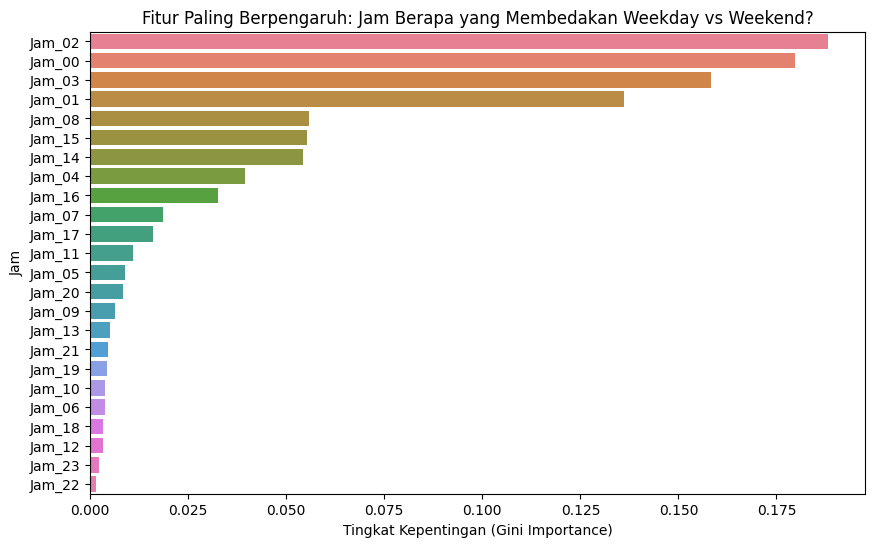

In [35]:
feature_names = [f"Jam_{i:02d}" for i in range(24)]

importances = rf_clf.feature_importances_

df_imp = pd.DataFrame({'Jam': feature_names, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Jam', hue='Jam', data=df_imp, legend=False)
plt.title('Fitur Paling Berpengaruh: Jam Berapa yang Membedakan Weekday vs Weekend?')
plt.xlabel('Tingkat Kepentingan (Gini Importance)')
plt.show()

## 6 Deployment

6.1 Tujuan Deployment

Tahap deployment bertujuan untuk mengimplementasikan model klasifikasi yang telah dievaluasi ke dalam sebuah aplikasi yang dapat digunakan oleh pengguna. Model diterapkan dalam bentuk aplikasi berbasis web agar proses prediksi dapat dilakukan secara interaktif dan mudah diakses.

6.2 Arsitektur Deployment

Model dideploy menggunakan Streamlit sebagai antarmuka pengguna. Aplikasi ini memungkinkan pengguna memasukkan data volume pejalan kaki tiap jam dalam satu hari sebagai input. Data tersebut kemudian diproses dan diteruskan ke model yang telah dilatih untuk menghasilkan prediksi kategori hari, yaitu weekday atau weekend.

Secara umum, alur kerja sistem adalah sebagai berikut:
1. Pengguna menginput volume pejalan kaki untuk setiap jam dalam satu hari.
2. Sistem melakukan validasi dan praproses data agar sesuai dengan format input model.
3. Model melakukan prediksi berdasarkan data time series yang diberikan.
4. Hasil prediksi ditampilkan langsung pada antarmuka aplikasi.

6.3 Implementasi Aplikasi

Model yang telah dilatih disimpan dalam bentuk file dan dimuat kembali pada aplikasi Streamlit. Proses inferensi dilakukan secara real-time tanpa perlu pelatihan ulang model.
Streamlit dipilih karena kemudahan integrasi dengan model machine learning serta kemampuannya menyajikan antarmuka yang sederhana dan interaktif.

6.4 Kesimpulan Deployment

Dengan implementasi berbasis Streamlit, sistem klasifikasi pola volume pejalan kaki dapat digunakan secara praktis oleh pengguna non-teknis. Deployment ini memungkinkan pemanfaatan model secara langsung untuk mendukung analisis dan pengambilan keputusan berdasarkan pola aktivitas harian.

### Save Model

In [36]:
import joblib
joblib.dump(rf_clf, 'deploy/models/random_forest_model.pkl')
joblib.dump(rocket_pipeline, 'deploy/models/rocket_model.pkl')

['deploy/models/rocket_model.pkl']

### Link Deploy
Kunjungi aplikasi melalui tautan berikut: https://time-series-classification.streamlit.app/